# Block & Search Data

In [1]:
# Data Analysis Packages
from sklearn import preprocessing
import pandas as pd
import numpy as np
import pickle as pk

In [2]:
# Graphing Packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Import and Save Data

### Bitcoin Block Data (from Prof. Zhang)

In [3]:
# Import BTC Dataset given to us by Prof. Zhang
file_location = '../dataset.csv'
btc_block_data = pd.read_csv(file_location,low_memory=False)

# Save the data as a pickled pandas dataframe
pk.dump(btc_block_data, open( "binary/og_block_data.p", "wb" ))

### New Bitcoin Block Data (from Blockchain.com)

In [4]:
# Import BTC Dataset given to us by Prof. Zhang
file_location = '../new_data.csv'
btc_block_data = pd.read_csv(file_location,low_memory=False,index_col=0)

# Save the data as a pickled pandas dataframe
pk.dump(btc_block_data, open( "binary/new_btc_data.p", "wb" ))

### Crypto Search Data (from Google Trends) Absolute

In [5]:
# Import pytrends package
import pytrends as pt
from pytrends.request import TrendReq

# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)

# Set the keyword & timeframe
keywords = ["Bitcoin", "Ethereum", "Dogecoin", "Binance Coin", "Litecoin"]
pt.build_payload(keywords, timeframe="all")

# Get the interest over time
crypto_search = pt.interest_over_time()

# Save search data as pickled pandas datafame and .csv file
pk.dump(crypto_search, open( "binary/og_search_data.p", "wb" ) )
crypto_search.to_csv("csv/og_search_data.csv")


### Crypto Search Data (from Google Trends) Relative

In [6]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)

# Set the keyword & timeframe
keywords = ["Bitcoin", "Ethereum", "Dogecoin", "Binance Coin", "Litecoin"]

crypto_search_relative = pd.DataFrame()

for i in keywords:
    pt.build_payload([i], timeframe="all")

    # Get the interest over time
    df = pt.interest_over_time()
    crypto_search_relative = pd.concat([crypto_search_relative,df],axis=1)

# Save search data as pickled pandas datafame and .csv file
pk.dump(crypto_search_relative, open( "binary/og_search_data_relative.p", "wb" ) )
crypto_search.to_csv("csv/og_search_data_relative.csv")

### Check that everything was imported and saved successfully

In [7]:
# Bitcoin block data
pk.load(open("binary/og_block_data.p", "rb"))

,height,host,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips,time
0,0,unknown,1,285,285,1140,0.000000,50.00,0.000000,3/1/2009 18:15
1,1,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:54
2,2,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:55
3,3,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:02
4,4,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:16
...,...,...,...,...,...,...,...,...,...,...
666611,666594,ViaBTC,1968,881571,1348518,3993231,0.000239,6.25,0.953732,18/1/2021 10:29
666612,666595,Foundry,2474,893448,1312647,3992991,0.000160,6.25,0.637013,18/1/2021 10:33
666613,666596,F2Pool,1896,819022,1541514,3998580,0.000123,6.25,0.493446,18/1/2021 10:41
666614,666597,Huobi.pool,2192,912273,1256245,3993064,0.000040,6.25,0.158978,18/1/2021 10:40


In [8]:
# Crypto search data
pk.load(open("binary/og_search_data.p", "rb"))

,Bitcoin,Ethereum,Dogecoin,Binance Coin,Litecoin,isPartial
date,,,,,,
2004-01-01,0,0,0,0,0,False
2004-02-01,0,0,0,0,0,False
2004-03-01,0,0,0,0,0,False
2004-04-01,0,0,0,0,0,False
2004-05-01,0,0,0,0,0,False
...,...,...,...,...,...,...
2022-07-01,30,6,1,0,0,False
2022-08-01,24,6,1,0,0,False
2022-09-01,21,7,1,0,0,False


In [9]:
# Bitcoin block data
pk.load(open("binary/og_search_data_relative.p", "rb"))

,Bitcoin,isPartial,Ethereum,isPartial,Dogecoin,isPartial,Binance Coin,isPartial,Litecoin,isPartial
date,,,,,,,,,,
2004-01-01,0,False,0,False,0,False,0,False,0,False
2004-02-01,0,False,0,False,0,False,0,False,0,False
2004-03-01,0,False,0,False,0,False,0,False,0,False
2004-04-01,0,False,0,False,0,False,0,False,0,False
2004-05-01,0,False,0,False,0,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,30,False,27,False,3,False,12,False,3,False
2022-08-01,24,False,26,False,3,False,13,False,3,False
2022-09-01,21,False,30,False,3,False,11,False,2,False


In [10]:
# New Bitcoin block data
pk.load(open("binary/new_btc_data.p", "rb"))

,avg-block-size,miners-revenue,n-transactions-per-block,transaction-fees,transaction-fees-usd,fee-per-transaction,fee-per-transaction-usd
Timestamp,,,,,,,
1/17/2009 0:00,0.000216,0.00,1.000000,0.000000,0.0000,0.000000,0.000000
1/20/2009 0:00,0.000225,0.00,1.008772,0.000000,0.0000,0.000000,0.000000
1/23/2009 0:00,0.000229,0.00,1.023810,0.000000,0.0000,0.000000,0.000000
1/26/2009 0:00,0.000240,0.00,1.010417,0.000000,0.0000,0.000000,0.000000
1/29/2009 0:00,0.000227,0.00,1.008264,0.000000,0.0000,0.000000,0.000000
...,...,...,...,...,...,...,...
4/30/2022 0:00,1.227106,37031311.35,1744.200000,10.461626,404406.7135,0.005998,231.857994
5/3/2022 0:00,1.124336,36261069.13,1852.633333,9.665812,369854.9831,0.005217,199.637444
5/6/2022 0:00,1.459280,33183643.80,2020.330986,16.961607,619675.2095,0.008395,306.719648


## Clean Block & Search Data

### Import the original datasets

In [11]:
# Bitcoin block data
og_block_data = pk.load(open("binary/og_block_data.p", "rb"))

# New Bitcoin Block data
new_btc_block_data = pk.load(open("binary/og_search_data_relative.p", "rb"))

# Crypto search data
og_search_data = pk.load(open("binary/og_search_data.p", "rb"))

# Crypto search data relative
og_search_data_relative = pk.load(open("binary/og_search_data_relative.p", "rb"))


In [12]:
og_block_data

,height,host,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips,time
0,0,unknown,1,285,285,1140,0.000000,50.00,0.000000,3/1/2009 18:15
1,1,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:54
2,2,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:55
3,3,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:02
4,4,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:16
...,...,...,...,...,...,...,...,...,...,...
666611,666594,ViaBTC,1968,881571,1348518,3993231,0.000239,6.25,0.953732,18/1/2021 10:29
666612,666595,Foundry,2474,893448,1312647,3992991,0.000160,6.25,0.637013,18/1/2021 10:33
666613,666596,F2Pool,1896,819022,1541514,3998580,0.000123,6.25,0.493446,18/1/2021 10:41
666614,666597,Huobi.pool,2192,912273,1256245,3993064,0.000040,6.25,0.158978,18/1/2021 10:40


### Match the date range for both datasets

In [13]:
# TODO match the dates of the search data to the dates of the block data
# Drop columns with non-numerical data and height (because it's useless)
block_data = og_block_data.drop(['host'],inplace=False,axis=1)

dic = {}

for i in list(block_data.index)[:]:
    lst = [ ]
    for k in [block_data[c][i] for c in block_data.columns]:
        if type(k) == str:
            key = k.split(" ")[0]
            var = key.split('/')  
            new_key = var[-2] + '/' + var[-1]
        else:
            lst.append(k)
            
    if key not in dic.keys():
        dic[new_key] = lst
        
# Convert the dictionary to a pandas dataframe and rename the columns
new_block_data = pd.DataFrame.from_dict(data=dic,orient='index',columns=list(block_data.columns)[:-1])

# Save the pickeled pandas dataframe
pk.dump(new_block_data, open("binary/new_block_data.p", "wb" ))

Absolute Search Data

In [14]:
# Truncate the data to match the date range of the bitcoin block dataset
new_search_data = og_search_data.truncate(
    before=list(og_search_data.index)[60],
    after=list(og_search_data.index)[204]
)

# Drop Useless columns
new_search_data.drop('isPartial',inplace=True,axis=1)

# Save the pickeled pandas dataframe
pk.dump(new_search_data, open("binary/new_search_data.p", "wb" ))

Relative Search Data

In [15]:
# Truncate the data to match the date range of the bitcoin block dataset
new_search_data_relative = og_search_data_relative.truncate(
    before=list(og_search_data_relative.index)[60],
    after=list(og_search_data_relative.index)[204]
)

# Drop Useless columns
new_search_data_relative.drop('isPartial',inplace=True,axis=1)

# Save the pickeled pandas dataframe
pk.dump(new_search_data_relative, open("binary/new_search_data_relative.p", "wb" ))

### Check that the data was cleaned and saved correctly

In [16]:
pk.load(open("binary/new_block_data.p", "rb" ))

,height,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips
1/2009,2543,1,216,216,864,0.000000,50.00,0.000000
2/2009,5923,1,216,216,864,0.000000,50.00,0.000000
3/2009,9389,1,216,216,864,0.000000,50.00,0.000000
4/2009,12831,1,216,216,864,0.000000,50.00,0.000000
5/2009,16214,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...,...
9/2020,650731,2783,940687,1176404,3998465,0.000122,6.25,0.485954
10/2020,654932,2364,921982,1232764,3998710,0.000168,6.25,0.670329
11/2020,659398,2923,923692,1221624,3992700,0.000221,6.25,0.880890
12/2020,663912,2126,907164,1272042,3993534,0.000088,6.25,0.349810


## Analyze Price & Block Data

In [17]:
pk.load(open("binary/new_search_data.p", "rb" ))

,Bitcoin,Ethereum,Dogecoin,Binance Coin,Litecoin
date,,,,,
2009-01-01,0,0,0,0,0
2009-02-01,0,0,0,0,0
2009-03-01,0,0,0,0,0
2009-04-01,0,0,0,0,0
2009-05-01,0,0,0,0,0
...,...,...,...,...,...
2020-09-01,13,2,0,0,0
2020-10-01,13,1,0,0,0
2020-11-01,23,3,0,0,1


In [18]:
pk.load(open("binary/new_search_data_relative.p", "rb" ))

,Bitcoin,Ethereum,Dogecoin,Binance Coin,Litecoin
date,,,,,
2009-01-01,0,0,0,0,0
2009-02-01,0,0,0,0,0
2009-03-01,0,0,0,0,0
2009-04-01,0,0,0,0,0
2009-05-01,0,0,0,0,0
...,...,...,...,...,...
2020-09-01,13,8,1,4,3
2020-10-01,13,6,0,3,3
2020-11-01,23,12,1,4,6


### Concatenate Block and Search Data

In [19]:
# Load binary files
new_block_data = pk.load(open("binary/new_block_data.p", "rb" ))
new_search_data = pk.load(open("binary/new_search_data.p", "rb" ))

# Match the indexes
new_block_data = new_block_data.set_index(new_search_data.index)
new_block_data.columns=['Height', 'Transaction Volume', 'Stripped Size', 'Size', 'Weight', 
                        'Avg. Transaction Fee', 'Block Reward', 'Block Reward Tips' ]

# Concatenate the block and search datasets
block_and_search_concat = pd.concat([new_search_data,new_block_data], axis=1)
# block_and_search_concat.drop(['isPartial'],inplace=True,axis=1)

block_and_search_concat =  block_and_search_concat.rename(columns={'Bitcoin':'Bitcoin Searches', 'Ethereum':'Ethereum Searches',
                                                                   'Binance Coin':'Binance Coin Searches', 'Dogecoin':'Dogecoin Searches',
                                                                   'Litecoin':'Litecoin Searches'})

# Save the concatenated dataset
pk.dump(block_and_search_concat, open("binary/block_and_search_concat.p", "wb" ))
block_and_search_concat.to_csv("csv/block_and_search_concat.csv")

# Show the dataset
block_and_search_concat

,Bitcoin Searches,Ethereum Searches,Dogecoin Searches,Binance Coin Searches,Litecoin Searches,Height,Transaction Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips
date,,,,,,,,,,,,,
2009-01-01,0,0,0,0,0,2543,1,216,216,864,0.000000,50.00,0.000000
2009-02-01,0,0,0,0,0,5923,1,216,216,864,0.000000,50.00,0.000000
2009-03-01,0,0,0,0,0,9389,1,216,216,864,0.000000,50.00,0.000000
2009-04-01,0,0,0,0,0,12831,1,216,216,864,0.000000,50.00,0.000000
2009-05-01,0,0,0,0,0,16214,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,13,2,0,0,0,650731,2783,940687,1176404,3998465,0.000122,6.25,0.485954
2020-10-01,13,1,0,0,0,654932,2364,921982,1232764,3998710,0.000168,6.25,0.670329
2020-11-01,23,3,0,0,1,659398,2923,923692,1221624,3992700,0.000221,6.25,0.880890


In [20]:
block_and_search_concat = block_and_search_concat.describe()
block_and_search_concat.to_csv("csv/price_and_block_concat_describe.csv")

In [21]:
# Load binary files
new_block_data = pk.load(open("binary/new_block_data.p", "rb" ))
new_search_data_relative = pk.load(open("binary/new_search_data_relative.p", "rb" ))

# Match the indexes
new_block_data = new_block_data.set_index(new_search_data_relative.index)
new_block_data.columns=['Height', 'Transaction Volume', 'Stripped Size', 'Size', 
                        'Weight', 'Avg. Transaction Fee', 'Block Reward', 'Block Reward Tips' ]

# Concatenate the block and search datasets
block_and_search_concat_relative = pd.concat([new_search_data_relative,new_block_data], axis=1)
# block_and_search_concat.drop(['isPartial'],inplace=True,axis=1)
block_and_search_concat_relative =  block_and_search_concat_relative.rename(columns={'Bitcoin':'Bitcoin Searches',
                                                                   'Ethereum':'Ethereum Searches',
                                                                   'Binance Coin':'Binance Coin Searches',
                                                                   'Dogecoin':'Dogecoin Searches',
                                                                   'Litecoin':'Litecoin Searches'
                                                                  })

# Save the concatenated dataset
pk.dump(block_and_search_concat_relative, open("binary/block_and_search_concat_relative.p", "wb" ))
block_and_search_concat.to_csv("csv/block_and_search_concat_relative.csv")

# Show the dataset
block_and_search_concat_relative

,Bitcoin Searches,Ethereum Searches,Dogecoin Searches,Binance Coin Searches,Litecoin Searches,Height,Transaction Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips
date,,,,,,,,,,,,,
2009-01-01,0,0,0,0,0,2543,1,216,216,864,0.000000,50.00,0.000000
2009-02-01,0,0,0,0,0,5923,1,216,216,864,0.000000,50.00,0.000000
2009-03-01,0,0,0,0,0,9389,1,216,216,864,0.000000,50.00,0.000000
2009-04-01,0,0,0,0,0,12831,1,216,216,864,0.000000,50.00,0.000000
2009-05-01,0,0,0,0,0,16214,1,216,216,864,0.000000,50.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,13,8,1,4,3,650731,2783,940687,1176404,3998465,0.000122,6.25,0.485954
2020-10-01,13,6,0,3,3,654932,2364,921982,1232764,3998710,0.000168,6.25,0.670329
2020-11-01,23,12,1,4,6,659398,2923,923692,1221624,3992700,0.000221,6.25,0.880890


### Calculate the correlation between the data points

In [22]:
# Load binary files
block_and_search_concat = pk.load(open("binary/block_and_search_concat.p", "rb" ))

# Show Correlation
block_and_search_corr = block_and_search_concat.corr(method='pearson')

# Saved the dataset
pk.dump(block_and_search_corr, open("binary/block_and_search_corr.p", "wb" ))

# Show the dataset
block_and_search_corr

,Bitcoin Searches,Ethereum Searches,Dogecoin Searches,Binance Coin Searches,Litecoin Searches,Height,Transaction Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips
Bitcoin Searches,1.000000,0.894754,0.502274,0.320053,0.856711,0.574370,0.536556,0.549756,0.565488,0.557155,0.091080,-0.546803,0.547941
Ethereum Searches,0.894754,1.000000,0.593758,0.355705,0.703326,0.505635,0.443356,0.521721,0.524551,0.525245,0.087972,-0.476600,0.509450
Dogecoin Searches,0.502274,0.593758,1.000000,0.178774,0.306660,0.173248,0.139626,0.135540,0.170032,0.146212,-0.009628,-0.159485,0.091290
Binance Coin Searches,0.320053,0.355705,0.178774,1.000000,0.228896,0.072337,0.207343,0.122149,0.097630,0.115696,0.092161,-0.078806,0.253377
Litecoin Searches,0.856711,0.703326,0.306660,0.228896,1.000000,0.249191,0.226667,0.292811,0.260159,0.284892,0.155213,-0.272511,0.499588
Height,0.574370,0.505635,0.173248,0.072337,0.249191,1.000000,0.788857,0.783032,0.824290,0.799018,-0.047837,-0.936178,0.377206
Transaction Volume,0.536556,0.443356,0.139626,0.207343,0.226667,0.788857,1.000000,0.907366,0.942120,0.922117,0.017954,-0.723766,0.544924
Stripped Size,0.549756,0.521721,0.135540,0.122149,0.292811,0.783032,0.907366,1.000000,0.974877,0.997925,0.015273,-0.760779,0.588991
Size,0.565488,0.524551,0.170032,0.097630,0.260159,0.824290,0.942120,0.974877,1.000000,0.987194,-0.020864,-0.770656,0.520569
Weight,0.557155,0.525245,0.146212,0.115696,0.284892,0.799018,0.922117,0.997925,0.987194,1.000000,0.004908,-0.767580,0.572270


### Visualize the correlation as a heat map

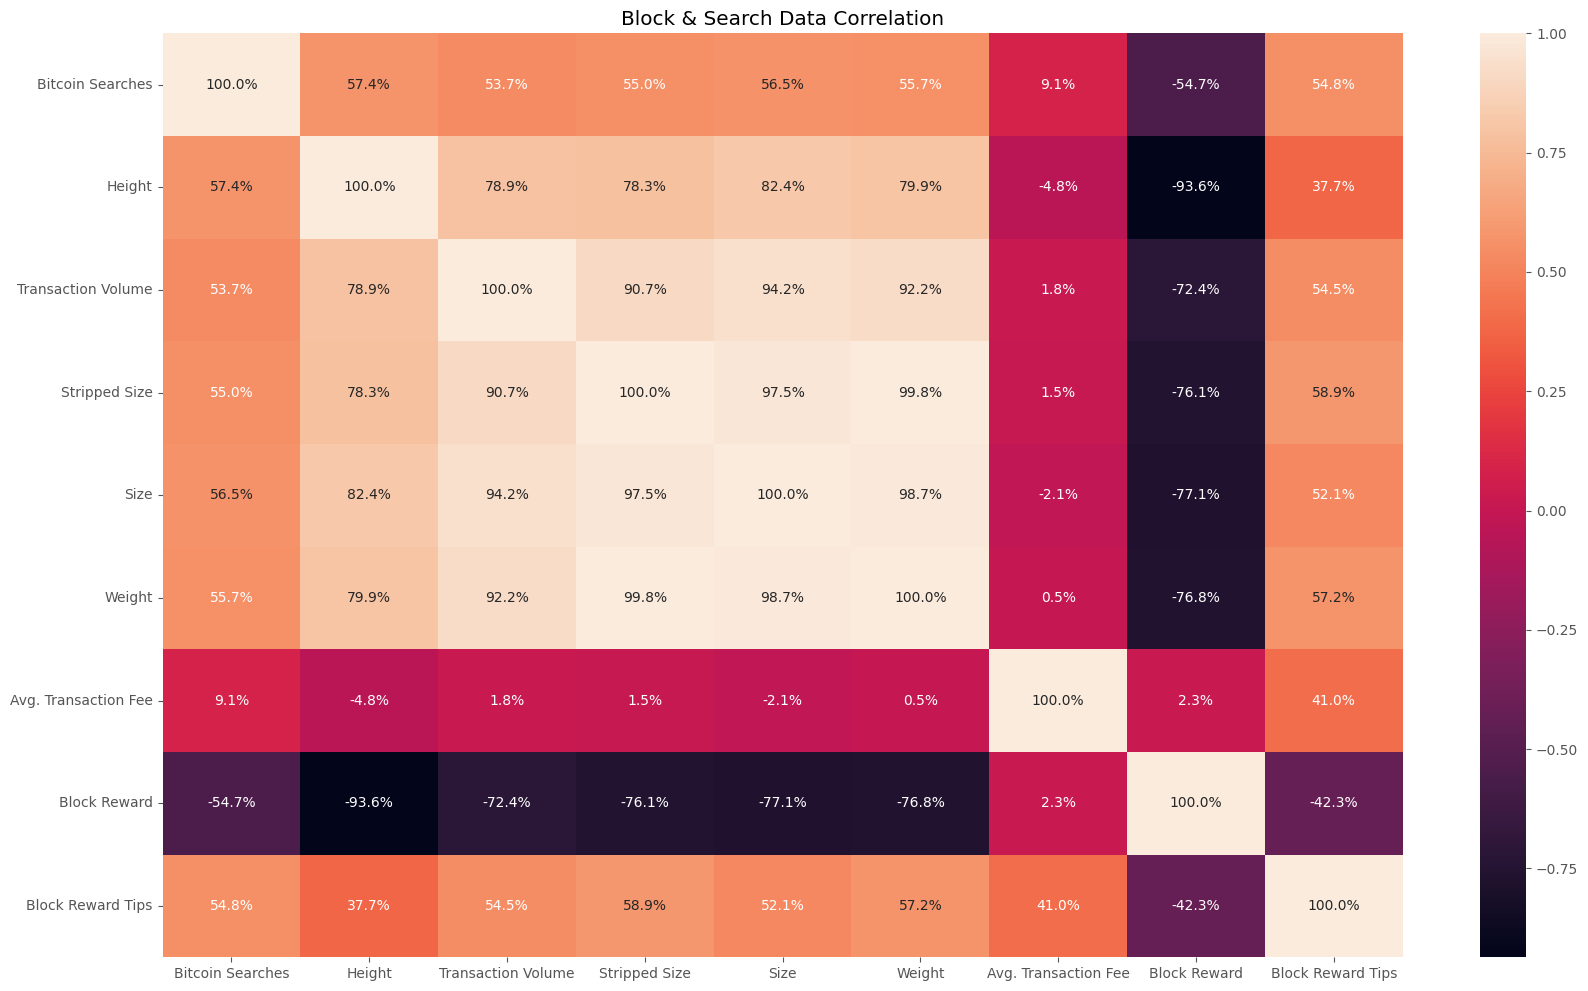

In [23]:
# Import data
block_and_search_corr = pk.load(open("binary/block_and_search_corr.p", "rb" ))

block_and_search_corr_temp = block_and_search_corr.drop(['Dogecoin Searches','Litecoin Searches',
                                                         'Ethereum Searches','Binance Coin Searches'], inplace=False, axis='index') 
block_and_search_corr_temp = block_and_search_corr_temp.drop(['Dogecoin Searches','Litecoin Searches',
                                                              'Ethereum Searches','Binance Coin Searches'], inplace=False, axis='columns') 

# Make the plot
plt.subplots(figsize= (20,12))
sns.heatmap(data=block_and_search_corr_temp,
            annot= True,
            fmt= '.1%',
            # linewidth=0.5
           )
            
# Add features
plt.title("Block & Search Data Correlation")

# Save the plot
plt.savefig("plots/block_and_search_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [24]:
# Load binary files
block_and_search_concat = pk.load(open("binary/block_and_search_concat.p", "rb" ))

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(block_and_search_concat)
block_and_search_scaled = pd.DataFrame(scaled, columns = block_and_search_concat.columns)
block_and_search_scaled = block_and_search_scaled.set_index(block_and_search_concat.index)

# Make adjustments
block_and_search_scaled['Time'] = [i for i in range(len(block_and_search_scaled.index))]

# Save the dataframe
pk.dump(block_and_search_scaled, open("binary/block_and_search_scaled.p", "wb" ))

# Show the dataframe
block_and_search_scaled

,Bitcoin Searches,Ethereum Searches,Dogecoin Searches,Binance Coin Searches,Litecoin Searches,Height,Transaction Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
date,,,,,,,,,,,,,,
2009-01-01,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000,0
2009-02-01,0.0,0.000000,0.0,0.0,0.0,0.508994,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000,1
2009-03-01,0.0,0.000000,0.0,0.0,0.0,1.030939,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000,2
2009-04-01,0.0,0.000000,0.0,0.0,0.0,1.549269,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000,3
2009-05-01,0.0,0.000000,0.0,0.0,0.0,2.058715,0.000000,0.000800,0.000579,0.000800,0.000000,100.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,13.0,18.181818,0.0,0.0,0.0,97.610589,77.342230,94.070101,85.115640,99.964417,5.415811,0.0,11.192310,140
2020-10-01,13.0,9.090909,0.0,0.0,0.0,98.243218,65.693634,92.199159,89.194141,99.970543,7.470022,0.0,15.438766,141
2020-11-01,23.0,27.272727,0.0,0.0,10.0,98.915752,81.234362,92.370199,88.387993,99.820258,9.831252,0.0,20.288305,142


### Visualize Search Data (Absolute)

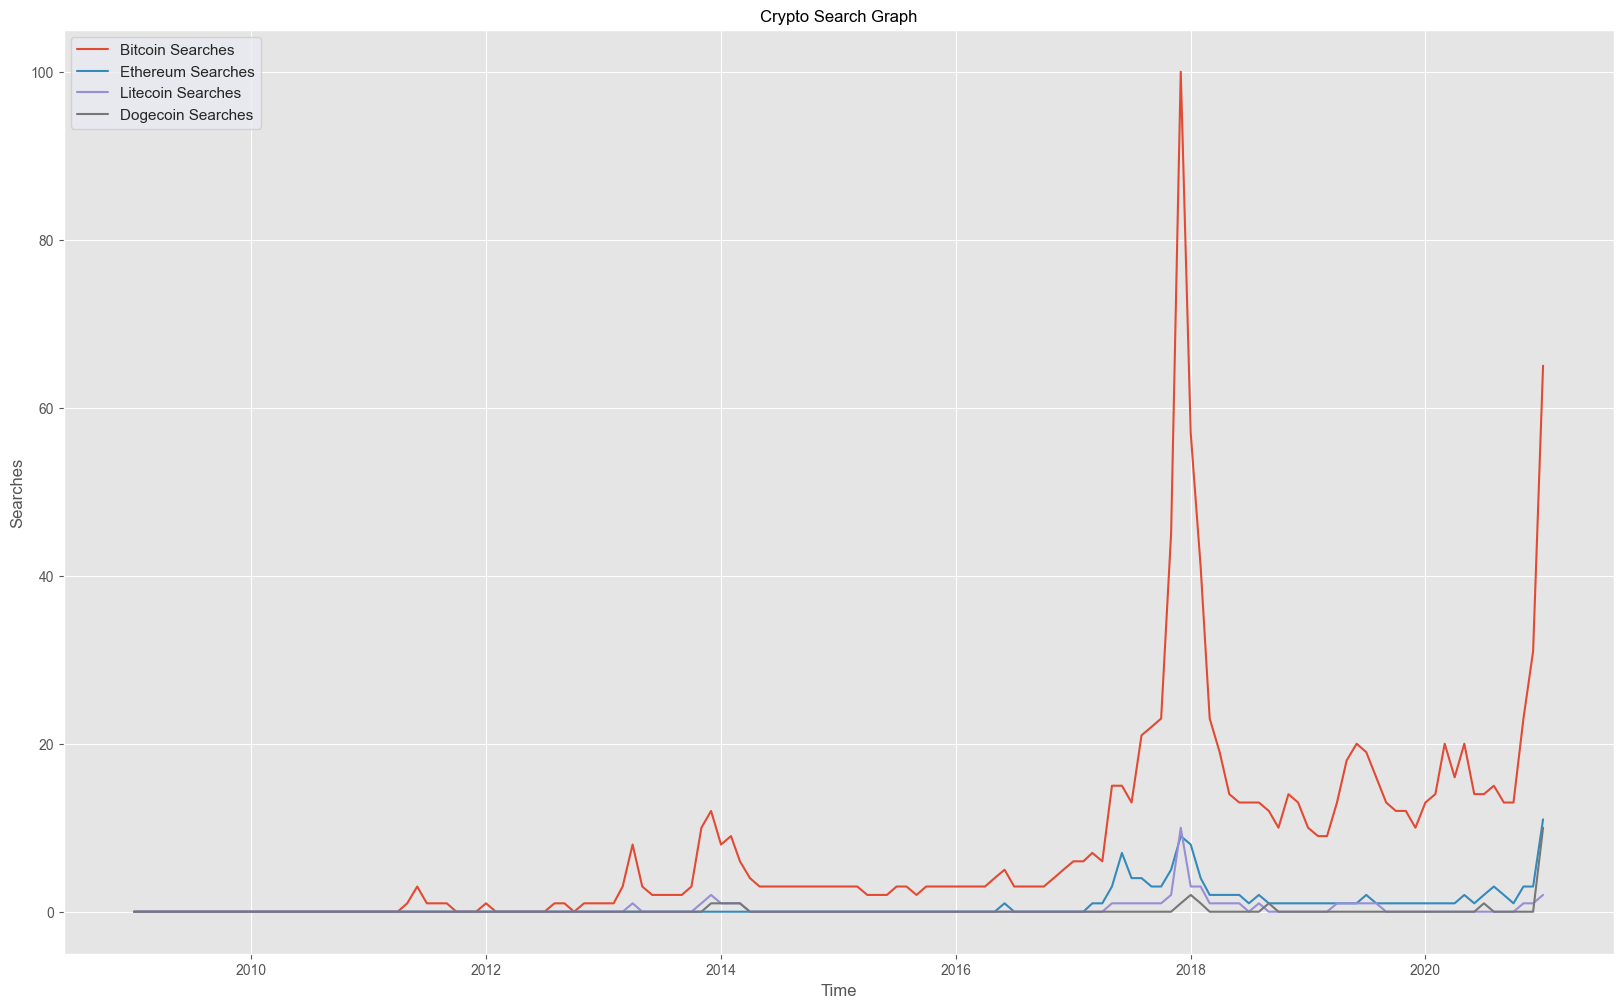

In [25]:
# Import data
block_and_search_concat = pk.load(open("binary/block_and_search_concat.p", "rb" ))

# Plot
plt.subplots(figsize= (20,12))

# Set theme
sns.set_theme(color_codes=True)

# Plot lines
sns.lineplot(x='date', 
            y='Bitcoin Searches', 
            data=block_and_search_concat,
            label='Bitcoin Searches')    

sns.lineplot(x='date',
            y='Ethereum Searches',
            data=block_and_search_concat,
            label='Ethereum Searches')    

sns.lineplot(x='date',
            y='Litecoin Searches',
            data=block_and_search_concat,
            label='Litecoin Searches')    

sns.lineplot(x='date',
            y='Dogecoin Searches',
            data=block_and_search_concat,
            label='Dogecoin Searches')    

# Add features
plt.title("Crypto Search Graph")
plt.xlabel('Time')
plt.ylabel('Searches')
plt.legend(loc='upper left')

# Save 
plt.savefig("plots/crypto_search_lineplot.jpg", dpi = 300)

# Show data
plt.show()

### Visualize Search Data (Relative)

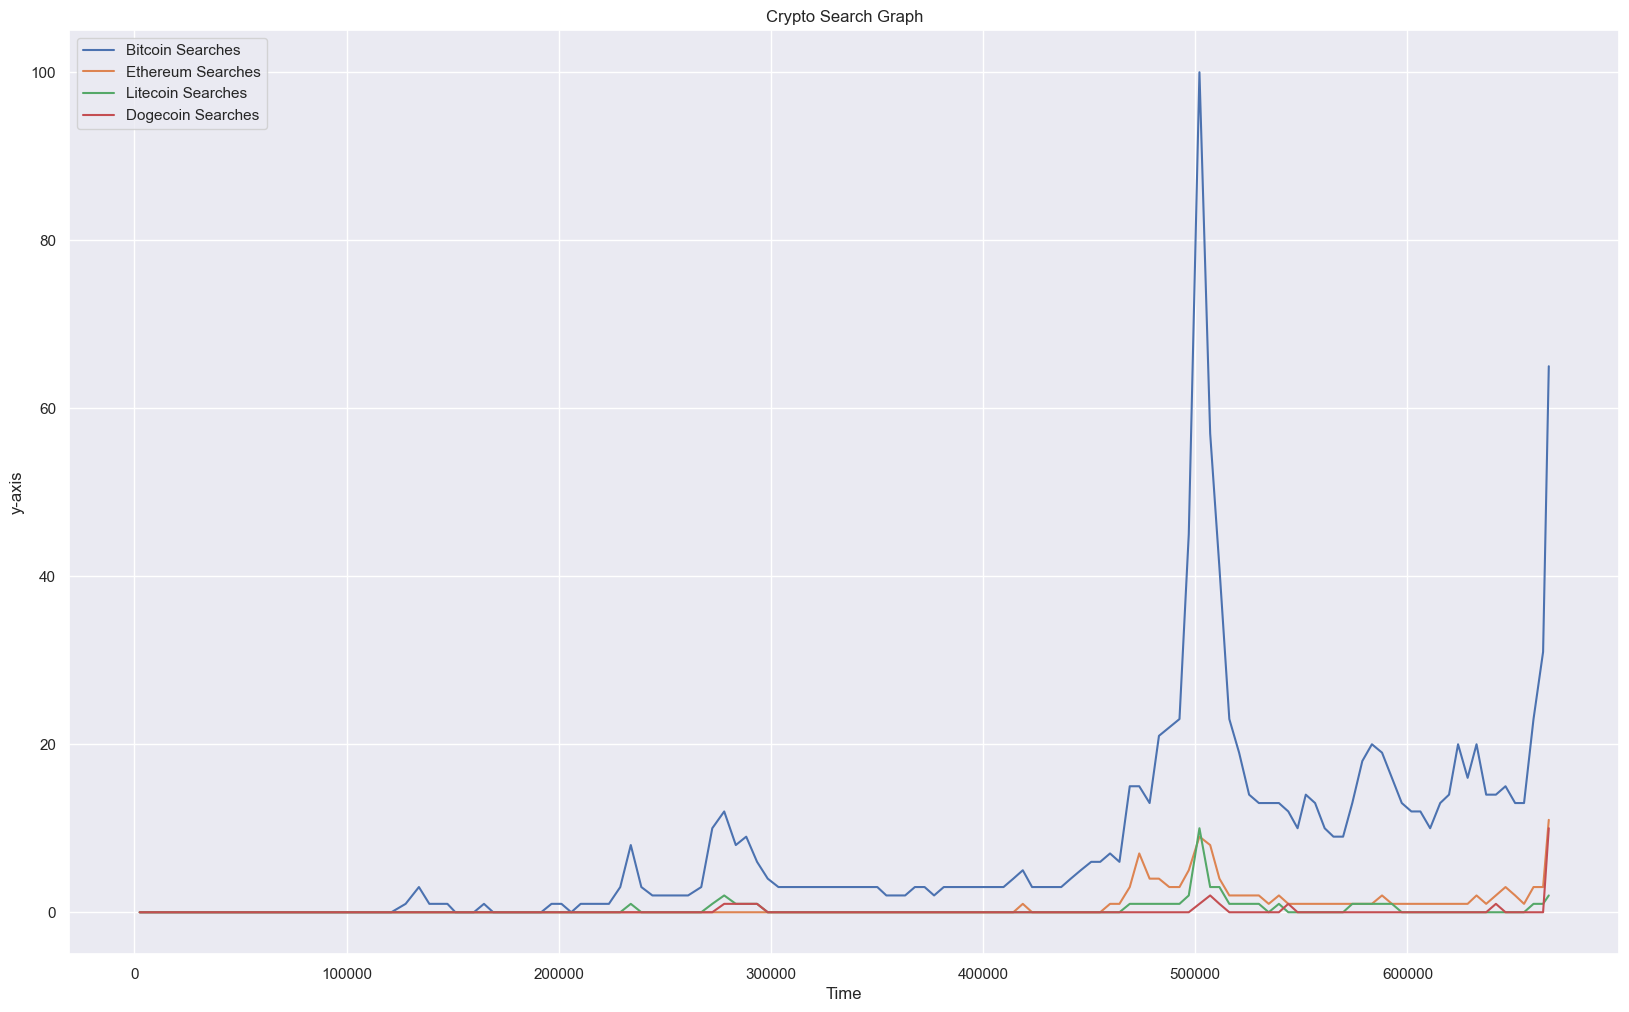

In [26]:
# Import data
block_and_search_concat_relative = pk.load(open("binary/block_and_search_concat_relative.p", "rb" ))

# Plot
plt.subplots(figsize= (20,12))
sns.set_theme(color_codes=True)

# Plot lines
sns.lineplot(x='Height', 
            y='Bitcoin Searches', 
            data=block_and_search_concat,
            label='Bitcoin Searches')    

sns.lineplot(x='Height',
            y='Ethereum Searches',
            data=block_and_search_concat,
            label='Ethereum Searches')    

sns.lineplot(x='Height',
            y='Litecoin Searches',
            data=block_and_search_concat,
            label='Litecoin Searches')    

sns.lineplot(x='Height',
            y='Dogecoin Searches',
            data=block_and_search_concat,
            label='Dogecoin Searches')    

# Add features
plt.title("Crypto Search Graph")
plt.xlabel('Time')
plt.ylabel('y-axis')
plt.legend(loc='upper left')

# Save 
plt.savefig("plots/crypto_search_lineplot_relative.jpg", dpi = 300)

# Show data
plt.show()

### Import and Prep New Block Data

In [27]:
# Import 
new_btc_block_data = pk.load(open("binary/new_btc_data.p", "rb" ))

# Prep
new_btc_block_data['Time'] = [i for i in range(len(new_btc_block_data.index))]

print(list(new_btc_block_data.columns))

['avg-block-size', 'miners-revenue', 'n-transactions-per-block', 'transaction-fees', 'transaction-fees-usd', 'fee-per-transaction', 'fee-per-transaction-usd', 'Time']


In [28]:
# Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(new_btc_block_data)
new_btc_block_data_scaled = pd.DataFrame(scaled, columns = new_btc_block_data.columns)
new_btc_block_data_scaled = new_btc_block_data_scaled.set_index(new_btc_block_data.index)


# Save the dataframe
pk.dump(new_btc_block_data_scaled, open("binary/new_btc_block_data_scaled.p", "wb" ))

# Show the dataframe
new_btc_block_data_scaled

,avg-block-size,miners-revenue,n-transactions-per-block,transaction-fees,transaction-fees-usd,fee-per-transaction,fee-per-transaction-usd,Time
Timestamp,,,,,,,,
1/17/2009 0:00,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1/20/2009 0:00,0.000637,0.000000,0.000321,0.000000,0.000000,0.000000,0.000000,0.061690
1/23/2009 0:00,0.000933,0.000000,0.000871,0.000000,0.000000,0.000000,0.000000,0.123381
1/26/2009 0:00,0.001634,0.000000,0.000381,0.000000,0.000000,0.000000,0.000000,0.185071
1/29/2009 0:00,0.000803,0.000000,0.000302,0.000000,0.000000,0.000000,0.000000,0.246761
...,...,...,...,...,...,...,...,...
4/30/2022 0:00,80.370685,52.424625,63.773114,0.699332,1.899903,0.104665,2.675020,99.753239
5/3/2022 0:00,73.638479,51.334206,67.740032,0.646134,1.737579,0.091043,2.303282,99.814929
5/6/2022 0:00,95.579859,46.977545,73.875072,1.133838,2.911235,0.146501,3.538723,99.876619


### Visualize Block Data (Scaled)

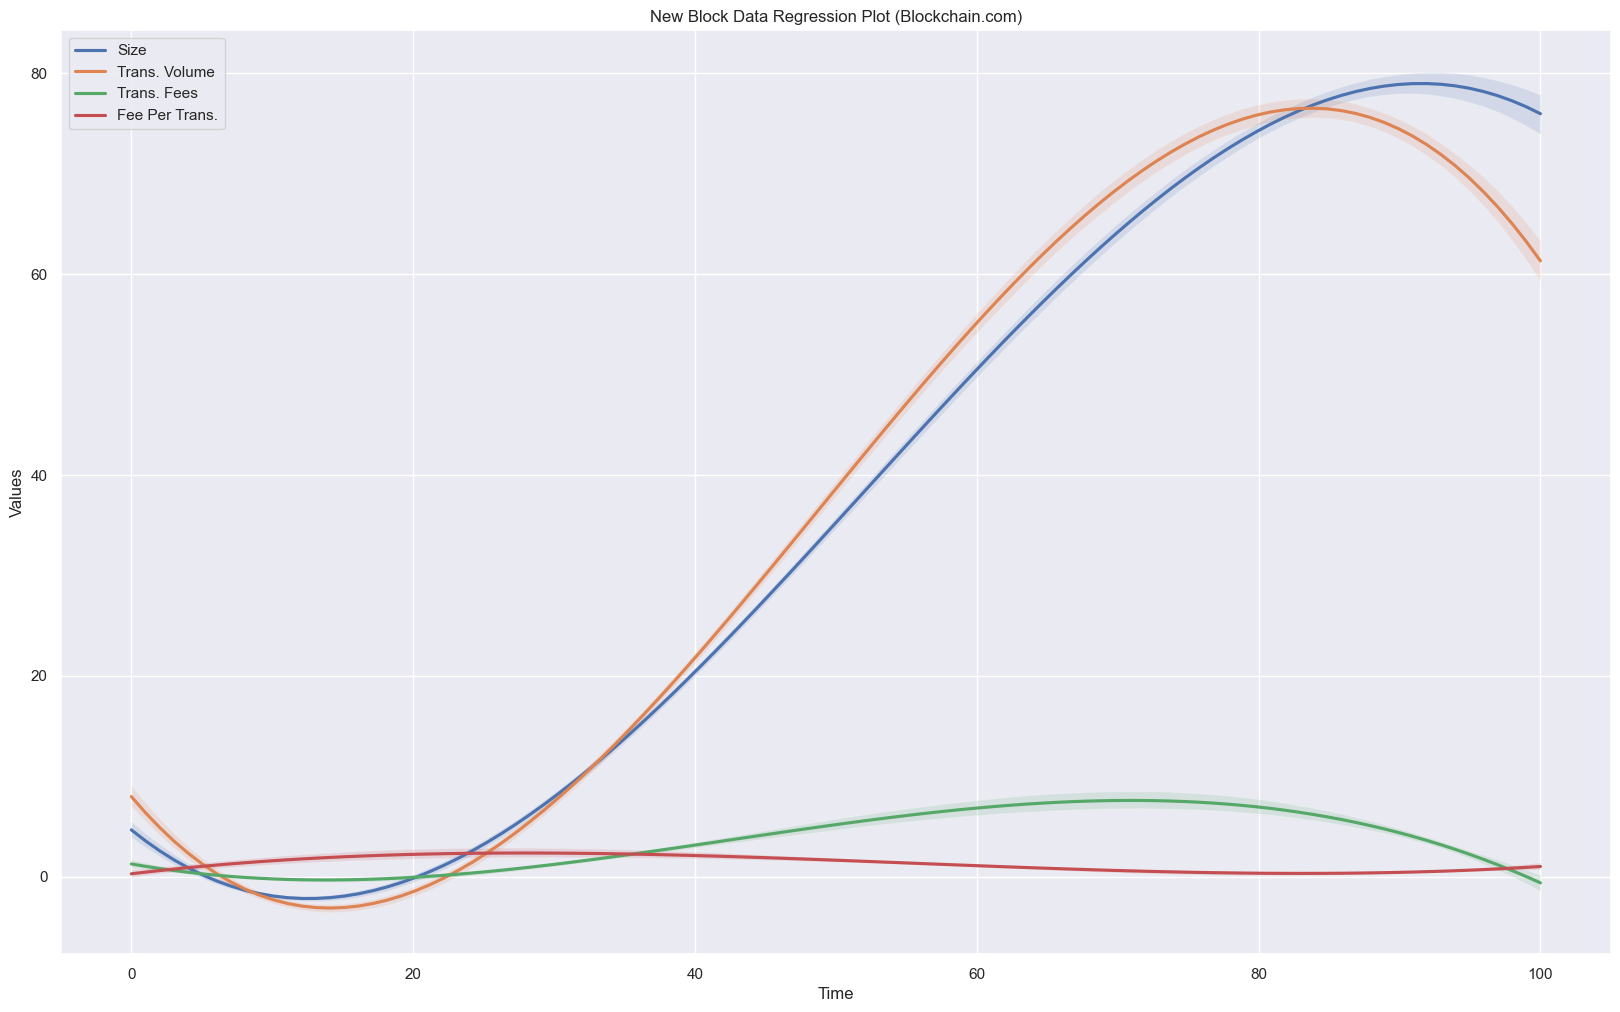

In [29]:
# Plot 
plt.subplots(figsize= (20,12))
sns.set_theme(color_codes=True)

sns.regplot(x='Time', 
            y='avg-block-size', 
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Size',
            order=3)    

sns.regplot(x='Time',
            y='n-transactions-per-block',
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Trans. Volume',
            order=3)    

sns.regplot(x='Time',
            y='transaction-fees',
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Trans. Fees',
            order=3)    

sns.regplot(x='Time',
            y='fee-per-transaction',
            data=new_btc_block_data_scaled,
            label='Fee Per Trans.',
            scatter=False,
            order=3)    

# Add features
plt.title("New Block Data Regression Plot (Blockchain.com)")
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(loc='upper left')

# Save plot
plt.savefig("plots/new_block_data_regression.jpg", dpi = 300)

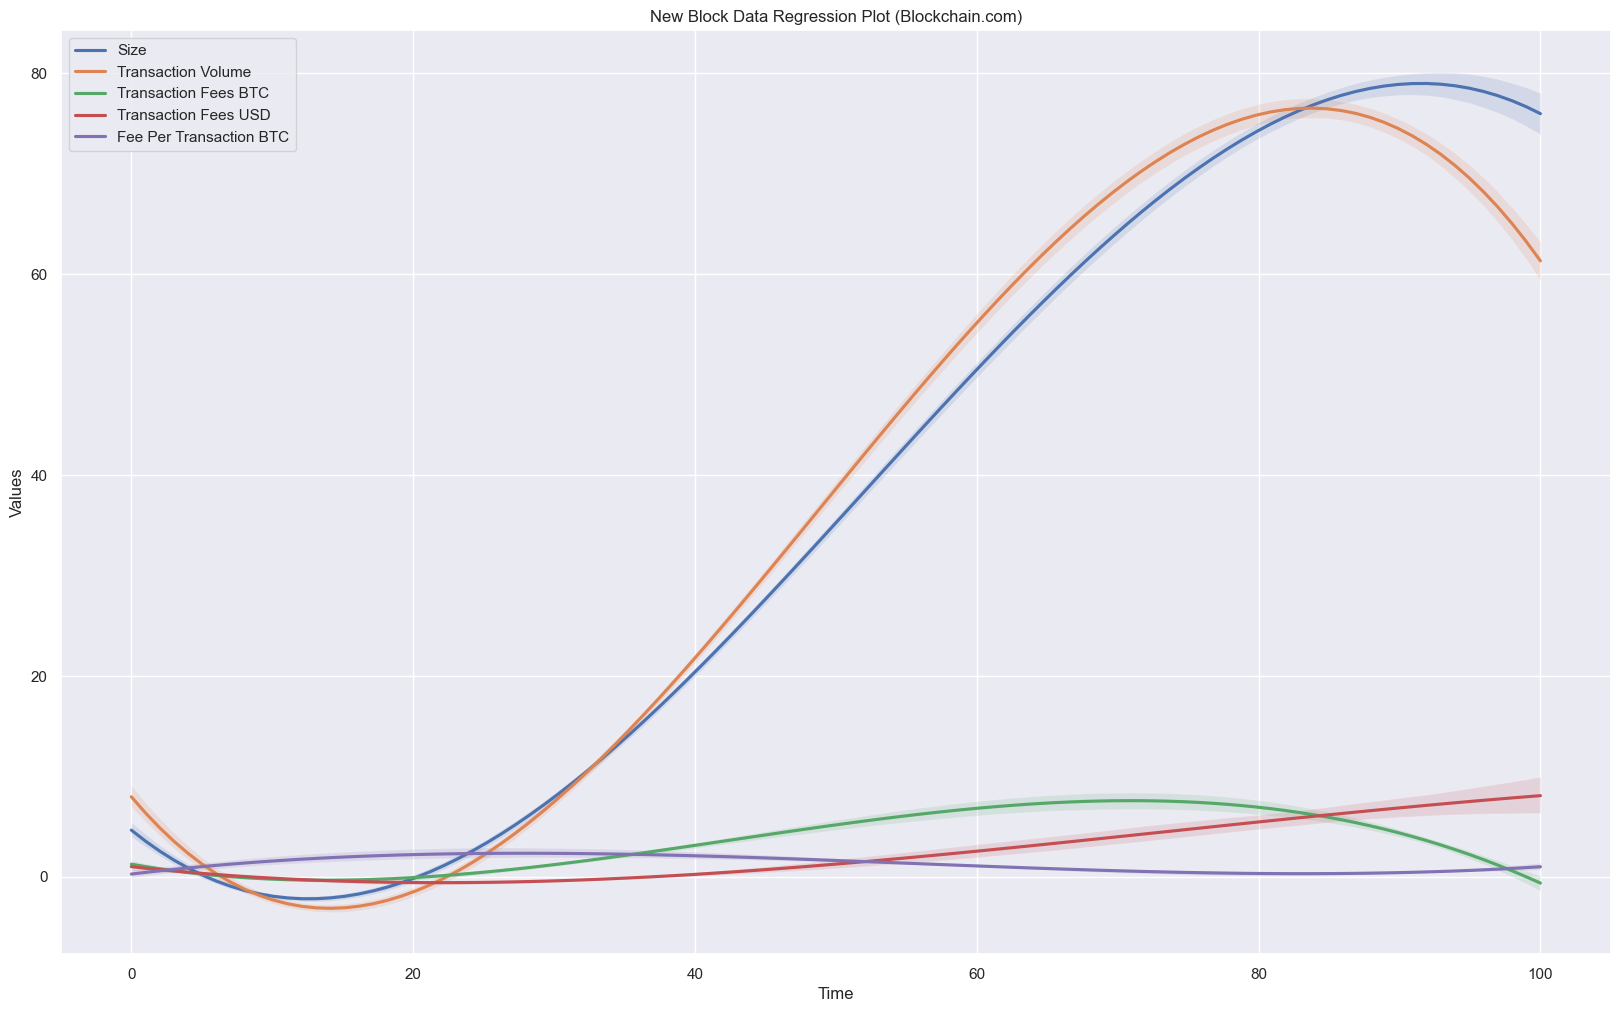

In [30]:
# Plot 
plt.subplots(figsize= (20,12))
sns.set_theme(color_codes=True)

sns.regplot(x='Time', 
            y='avg-block-size', 
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Size',
            order=3)    

sns.regplot(x='Time',
            y='n-transactions-per-block',
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Transaction Volume',
            order=3)    

sns.regplot(x='Time',
            y='transaction-fees',
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Transaction Fees BTC',
            order=3)    

sns.regplot(x='Time',
            y='transaction-fees-usd',
            data=new_btc_block_data_scaled,
            scatter=False,
            label='Transaction Fees USD',
            order=3)    

sns.regplot(x='Time',
            y='fee-per-transaction',
            data=new_btc_block_data_scaled,
            label='Fee Per Transaction BTC',
            scatter=False,
            order=3)    

# Add features
plt.title("New Block Data Regression Plot (Blockchain.com)")
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(loc='upper left')

# Save plot
plt.savefig("plots/new_block_data_regression_additional.jpg", dpi = 300)

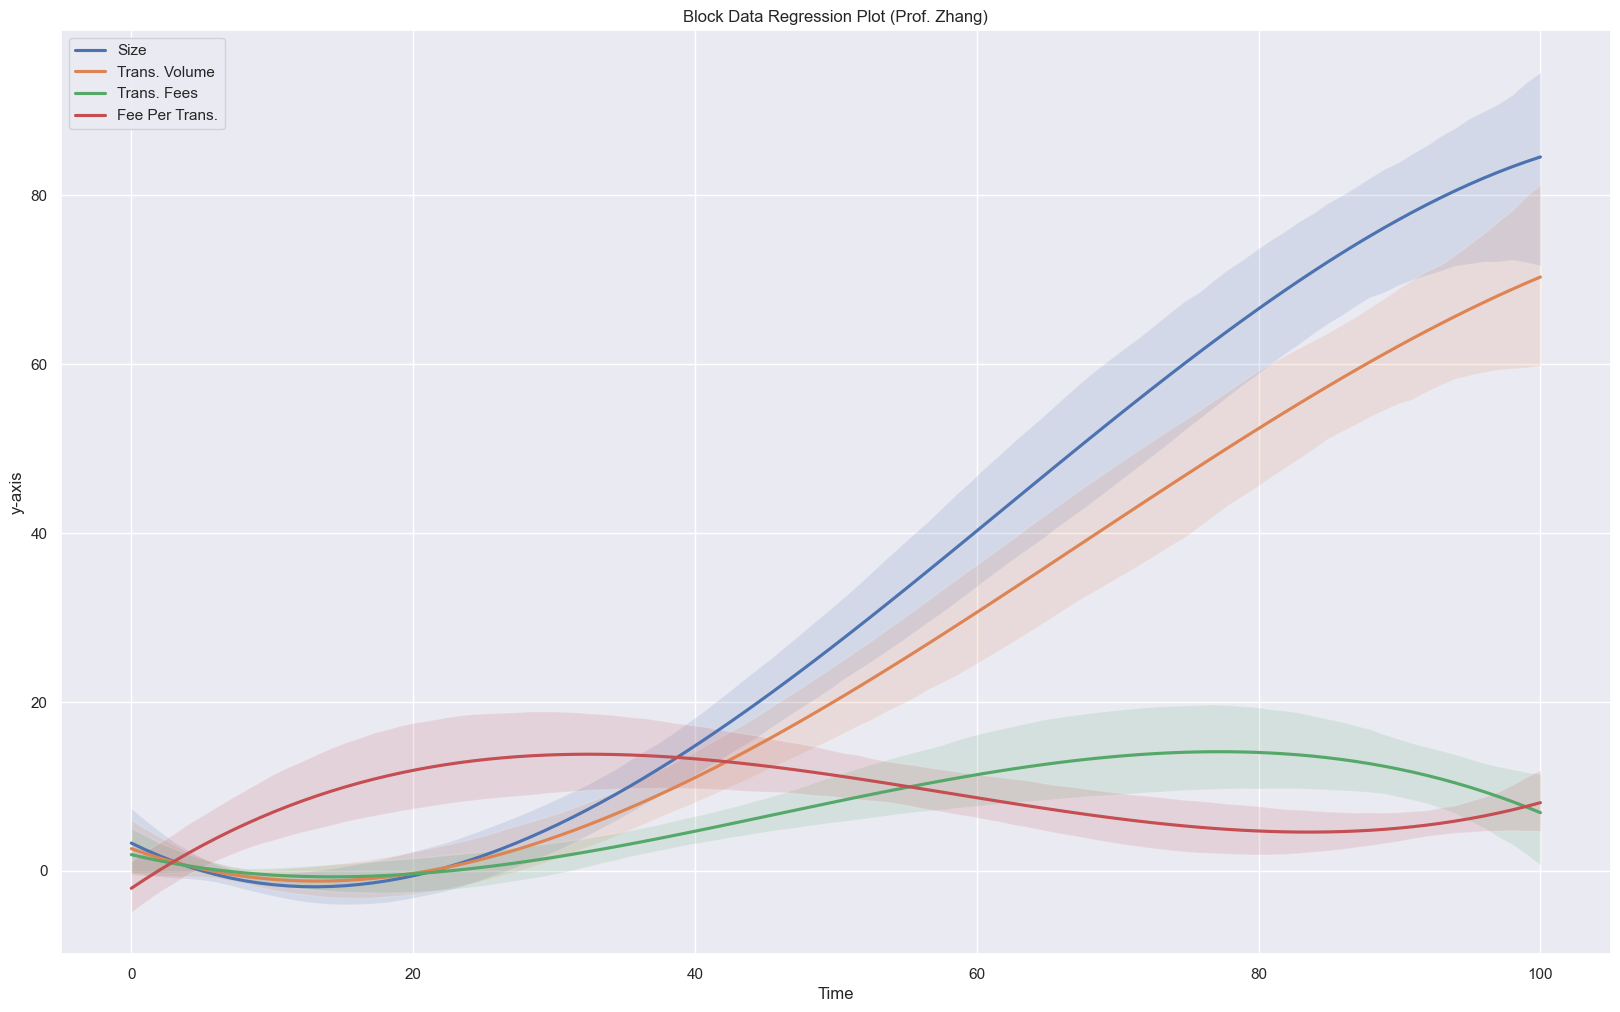

In [31]:
# Import 
block_and_search_scaled = pk.load(open("binary/block_and_search_scaled.p", "rb" ))

# Plot 
plt.subplots(figsize= (20,12))
sns.set_theme(color_codes=True)

sns.regplot(x='Height', 
            y='Size', 
            data=block_and_search_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Transaction Volume',
            data=block_and_search_scaled,
            label='Trans. Volume',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Block Reward Tips',
            data=block_and_search_scaled,
            label='Trans. Fees',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Avg. Transaction Fee',
            data=block_and_search_scaled,
            label='Fee Per Trans.',
            scatter=False,
            order=3)    

# Add features
plt.title("Block Data Regression Plot (Prof. Zhang)")
plt.xlabel('Time')
plt.ylabel('y-axis')
plt.legend(loc='upper left')

# Save plot
plt.savefig("plots/block_data_regression.jpg", dpi = 300)

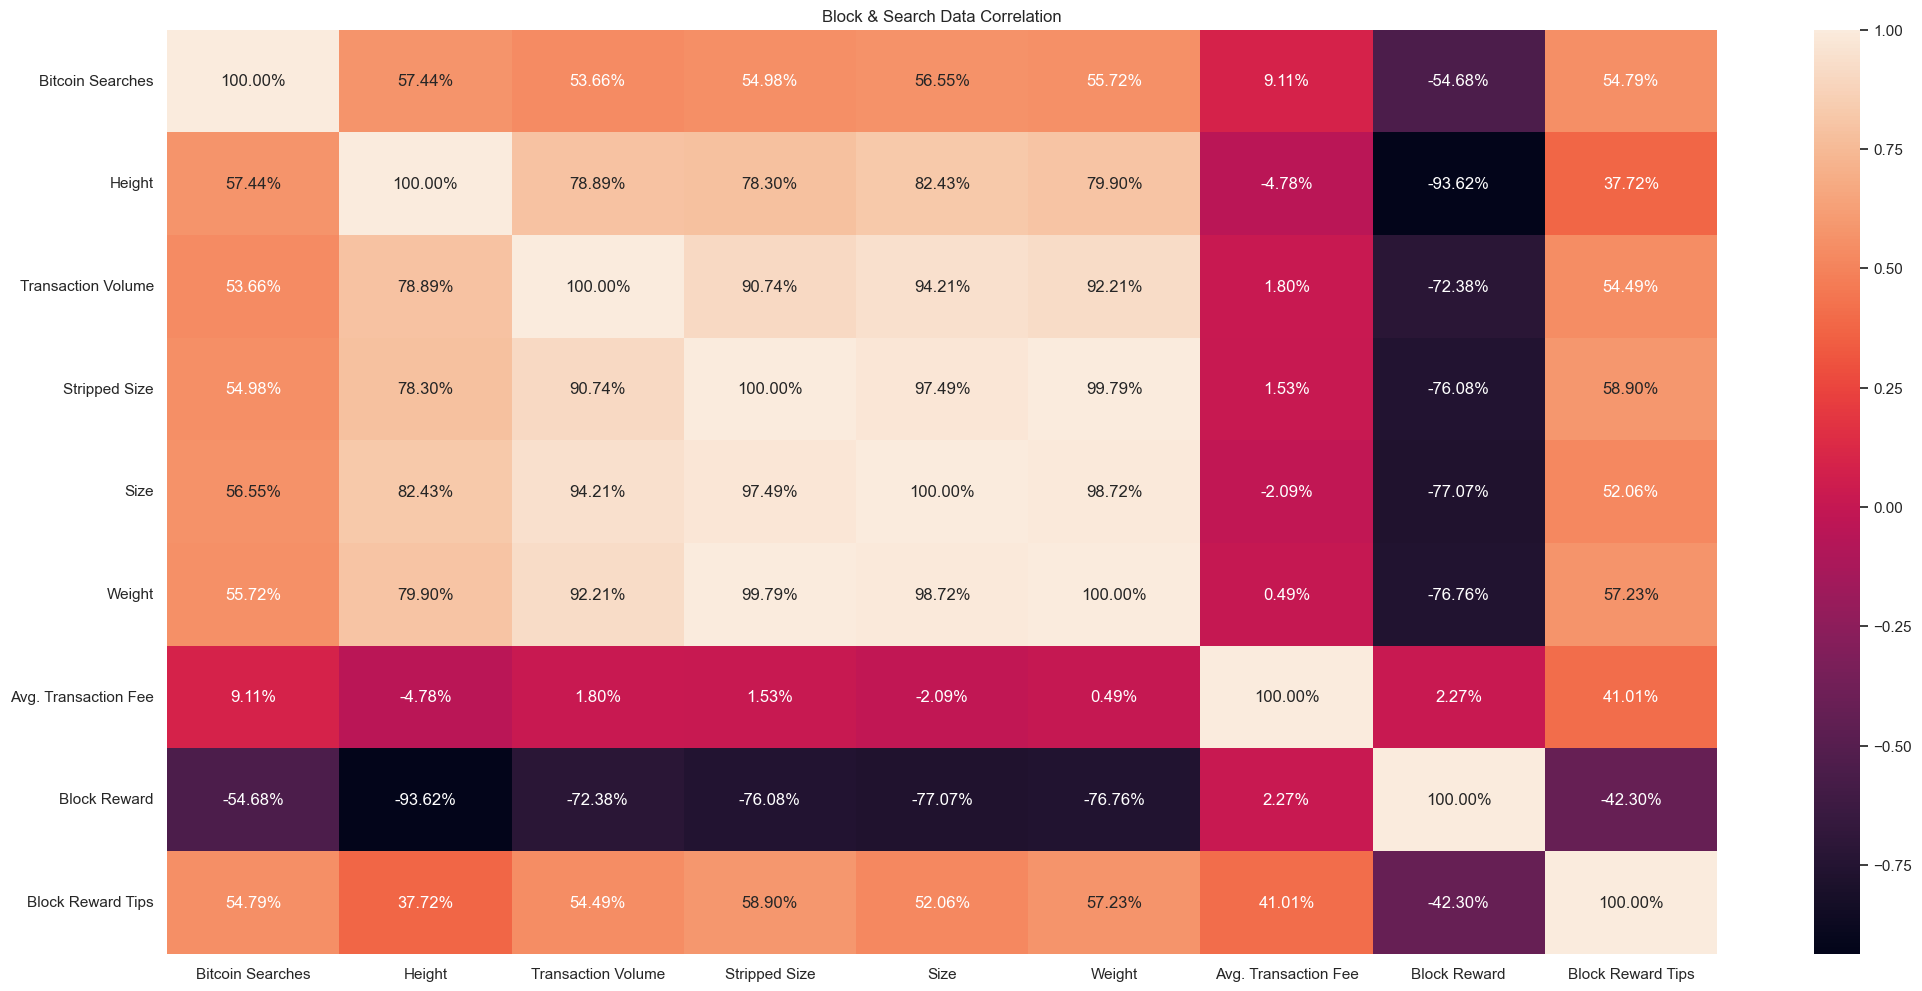

In [32]:
plt.subplots(figsize= (25,12))
sns.heatmap(block_and_search_corr_temp, annot= True, fmt= '.2%')
plt.title("Block & Search Data Correlation")
plt.savefig("plots/block_and_search_corr.jpg", dpi = 300)

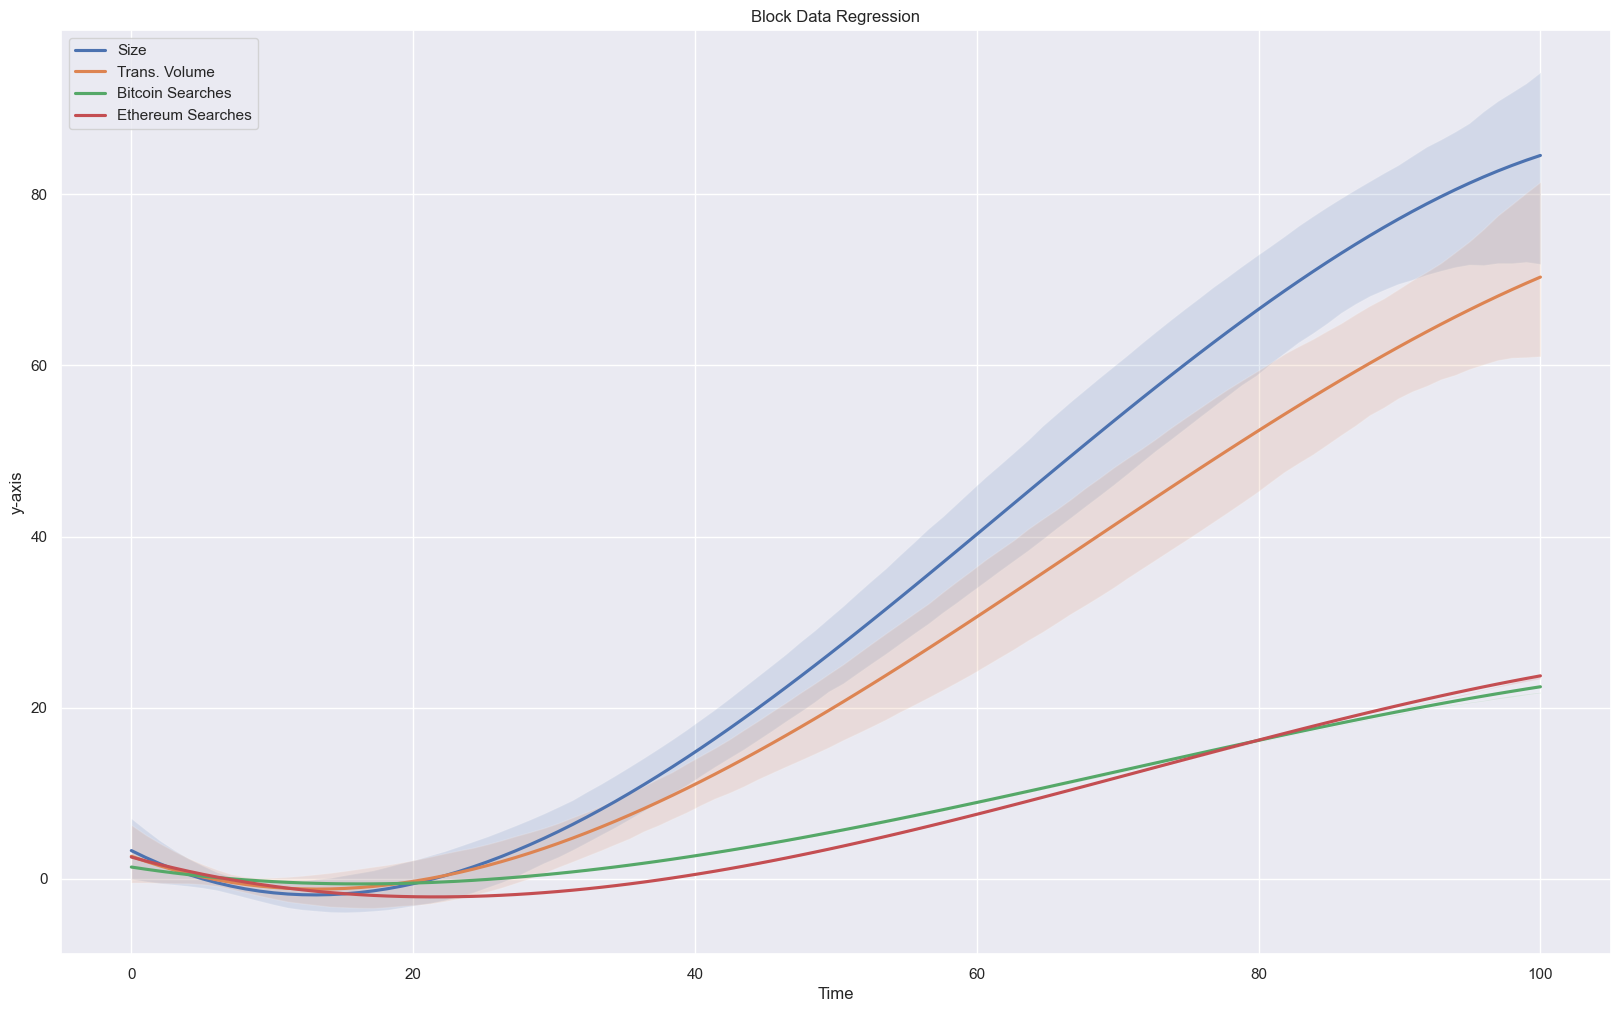

In [33]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.regplot(x='Height', 
            y='Size', 
            data=block_and_search_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Transaction Volume',
            data=block_and_search_scaled,
            label='Trans. Volume',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Bitcoin Searches',
            data=block_and_search_scaled,
            label='Bitcoin Searches',
            scatter=False,
            ci=True,
            order=3)    

sns.regplot(x='Height',
            y='Ethereum Searches',
            data=block_and_search_scaled,
            label='Ethereum Searches',
            scatter=False,
            ci=True,
            order=3)    


plt.title("Block Data Regression")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots/block_and_search_data_regression.jpg", dpi = 300)
plt.show()

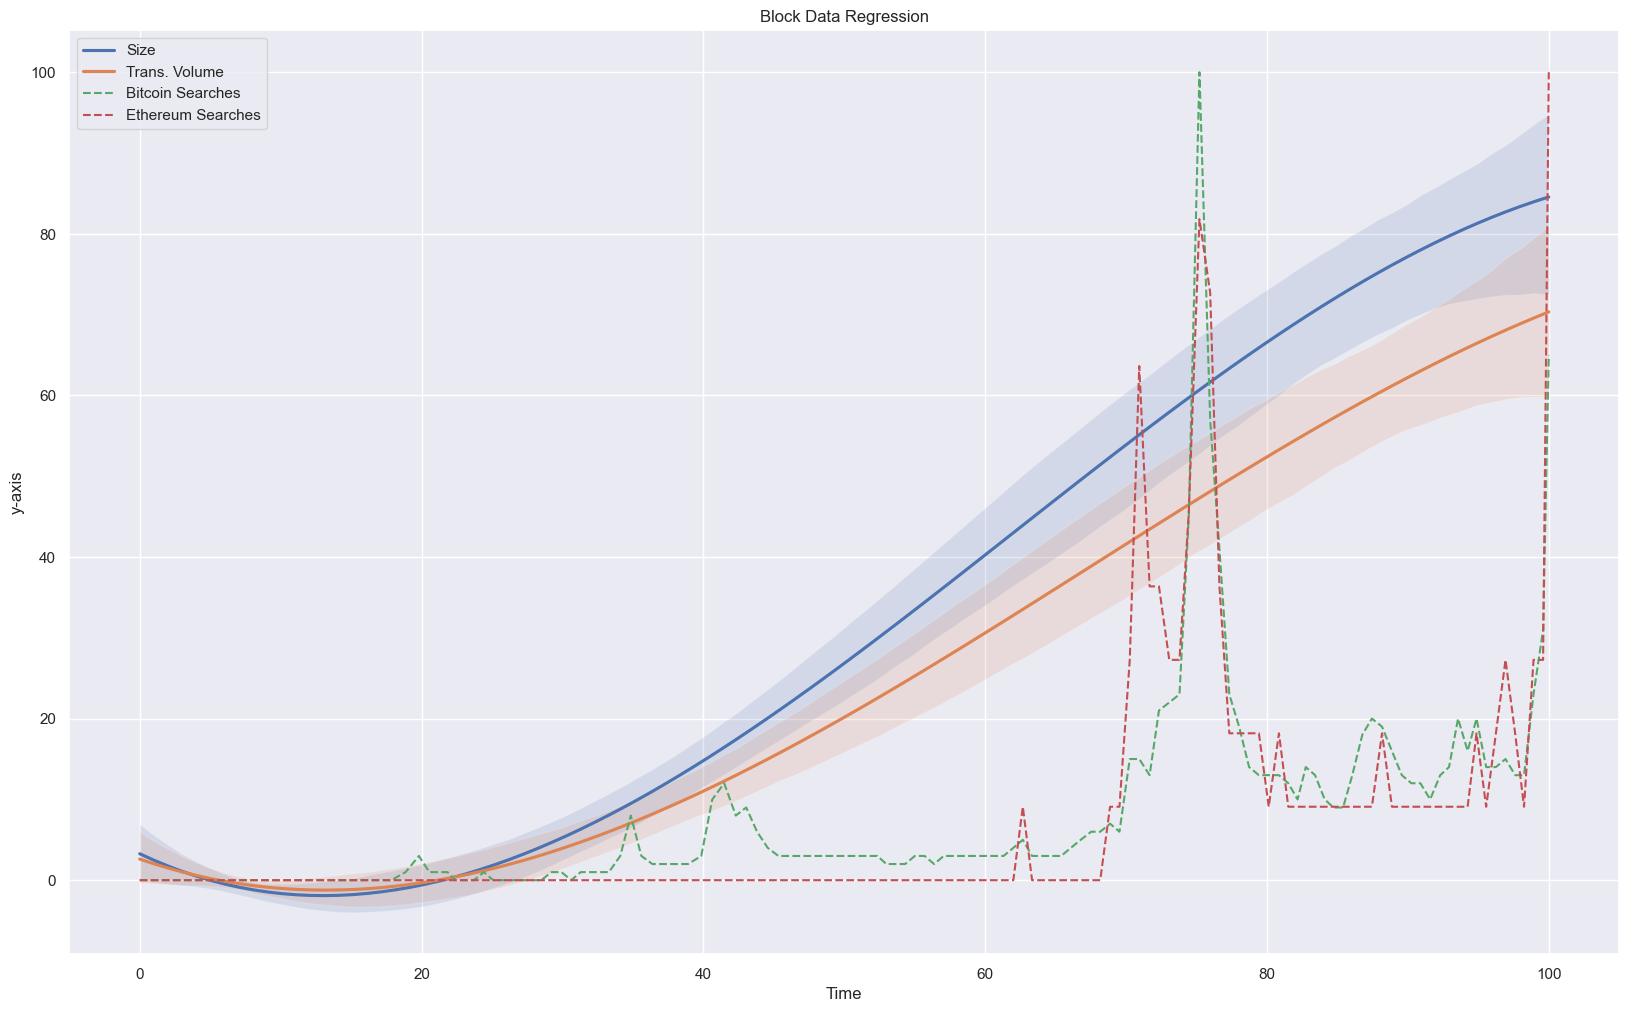

In [34]:
plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.regplot(x='Height', 
            y='Size', 
            data=block_and_search_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Transaction Volume',
            data=block_and_search_scaled,
            label='Trans. Volume',
            scatter=False,
            order=3)    

sns.lineplot(x='Height',
            y='Bitcoin Searches',
            data=block_and_search_scaled,
            label='Bitcoin Searches',
            linestyle="dashed")

sns.lineplot(x='Height',
            y='Ethereum Searches',
            data=block_and_search_scaled,
            label='Ethereum Searches',
            linestyle="dashed")    

plt.title("Block Data Regression")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots/block_and_search_data_regression_and_line.jpg", dpi = 300)
plt.show()